In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import psutil

Download Raw Data

In [21]:
#CCY Collection
#for the selected ccy, the data is downloaded from yahoo finance

#Download data
DXY = ['DX-Y.NYB']
AUD = ['AUDUSD=X']
CAD = ['CADUSD=X']
CHF = ['CHFUSD=X']
EUR = ['EURUSD=X']
GBP = ['GBPUSD=X']
JPY = ['JPYUSD=X']
NZD = ['NZDUSD=X']
SEK = ['SEKUSD=X']
NOK = ['NOKUSD=X']
ZAR = ['ZARUSD=X']
TWD = ['TWDUSD=X']
JPY = ['JPYUSD=X']
KRW = ['KRWUSD=X']
SGD = ['SGDUSD=X']
HKD = ['HKDUSD=X']
CNY = ['CNYUSD=X']
INR = ['INRUSD=X']
THB = ['THBUSD=X']
VND = ['VNDUSD=X']

#input
CCY = DXY
start_date = '1999-01-01'
end_date = pd.Timestamp(datetime.now()).strftime('%Y-%m-%d')

#selecting the outliers daily
data_daily = yf.download(CCY, start=start_date, end=end_date)['Adj Close']
q75, q25 = np.percentile(data_daily, [75 ,25])
iqr = q75 - q25
data_daily = data_daily[(data_daily >= q25 - 1 * iqr) & (data_daily <= q75 + 1 * iqr)]
returns_daily = data_daily.pct_change()
returns_daily = pd.DataFrame(returns_daily)

#selecting the outliers monthly
data_monthly = yf.download(CCY, start=start_date, end=end_date, interval= "1mo")['Adj Close']
q75, q25 = np.percentile(data_monthly, [75 ,25])
iqr = q75 - q25
data_monthly = data_monthly[(data_monthly >= q25 - 10 * iqr) & (data_monthly <= q75 + 10 * iqr)]
returns_monthly = data_monthly.pct_change()
returns_monthly = pd.DataFrame(returns_monthly)

#Get the seasonal components
data_monthly = pd.DataFrame(data_monthly)
data_monthly.index = pd.to_datetime(data_monthly.index)
selected_months = [3, 6, 9, 12]
data_quarterly = data_monthly[data_monthly.index.month.isin(selected_months)]
returns_quarterly = data_quarterly.pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


CCY Time Series Chart

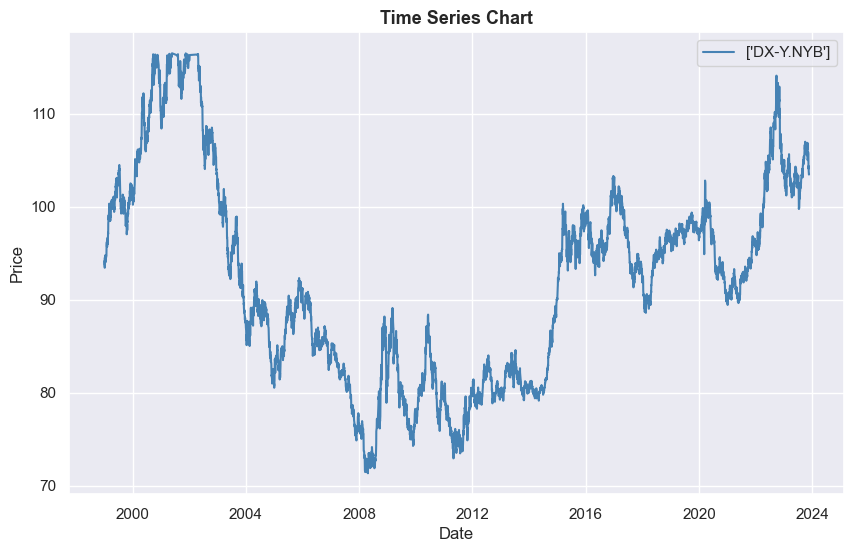

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(data_daily.index, data_daily, label=CCY, color='steelblue')
plt.title('Time Series Chart', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Time Series Trend Decomposition

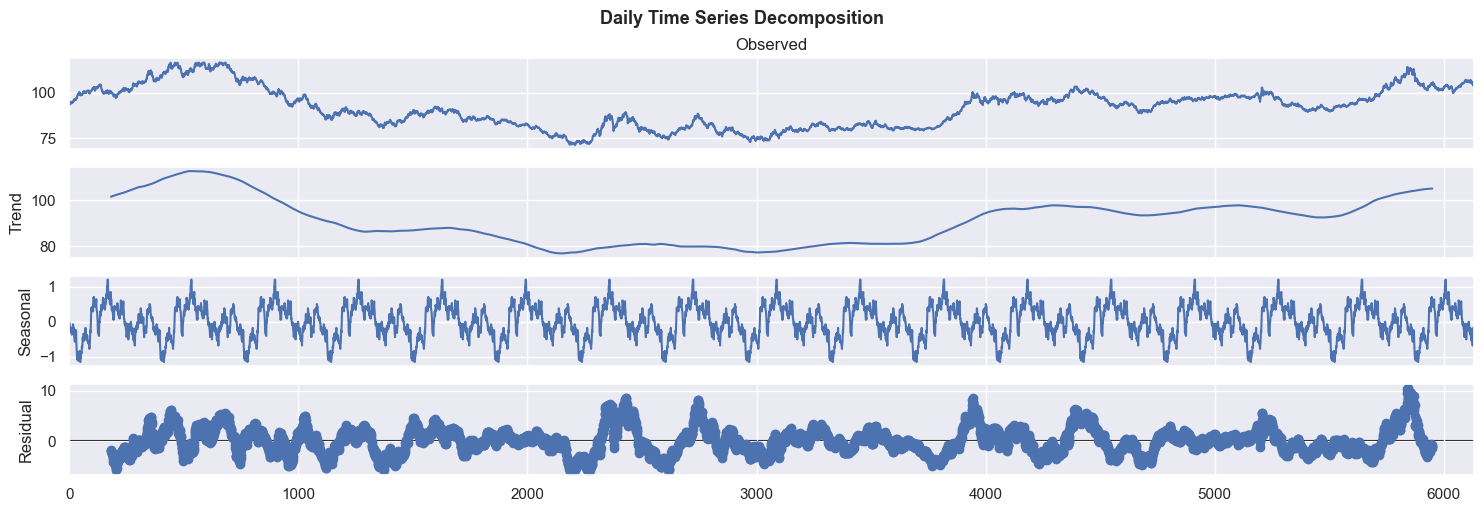

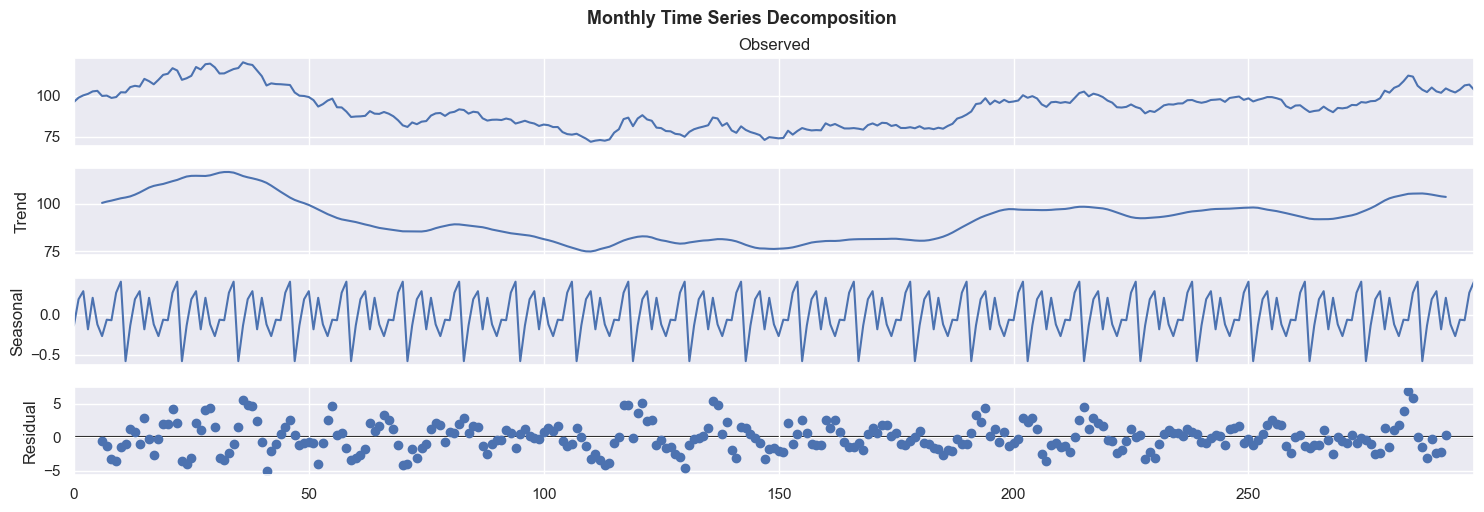

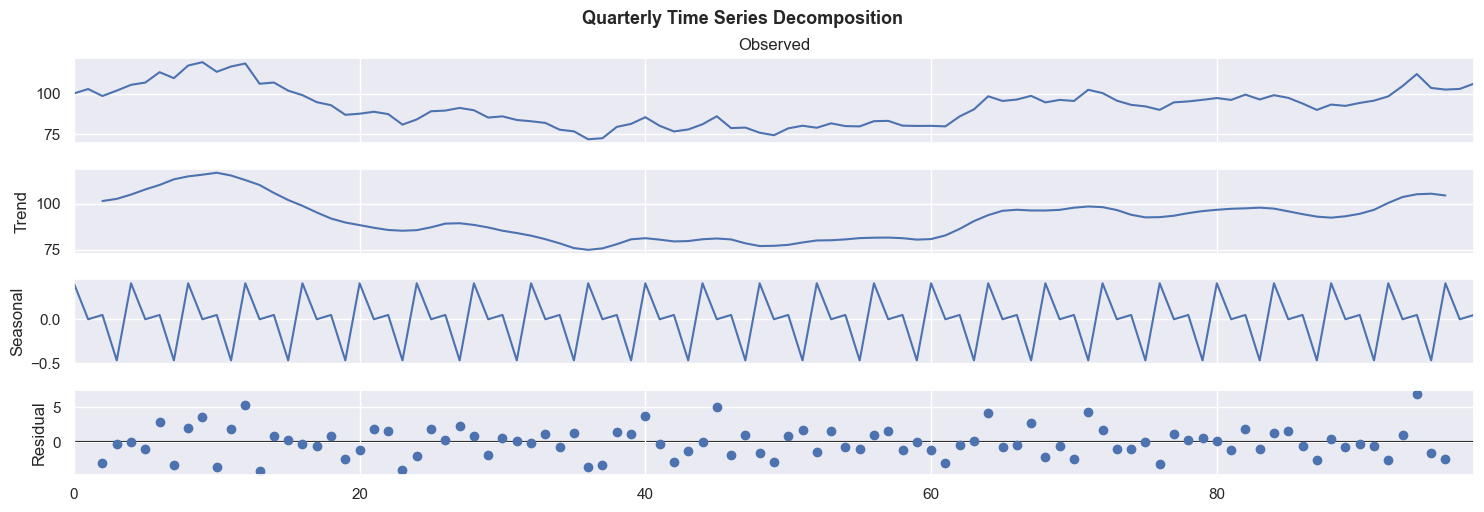

In [23]:
sns.set(style="darkgrid", rc={"figure.figsize": (15, 5)})

# Daily Time Series Decomposition
result_daily = seasonal_decompose(np.array(data_daily), model='additive', period=365)
result_daily.plot()
plt.suptitle("Daily Time Series Decomposition", fontsize=13, fontweight='bold', y=1.02 )
plt.show()

# Monthly Time Series Decomposition
result_monthly = seasonal_decompose(np.array(data_monthly), model='additive', period=12)
result_monthly.plot()
plt.suptitle("Monthly Time Series Decomposition", fontsize=13, fontweight='bold', y=1.02)
plt.show()

# Quarterly Time Series Decomposition
result_quarterly = seasonal_decompose(np.array(data_quarterly), model='additive', period=4)
result_quarterly.plot()
plt.suptitle("Quarterly Time Series Decomposition", fontsize=13, fontweight='bold', y=1.02)
plt.show()

Data Cleaning

In [24]:
#Define Quarterly Returns
DXY_Q1_returns = returns_quarterly[returns_quarterly.index.month == 3]
DXY_Q2_returns = returns_quarterly[returns_quarterly.index.month == 6]
DXY_Q3_returns = returns_quarterly[returns_quarterly.index.month == 9]
DXY_Q4_returns = returns_quarterly[returns_quarterly.index.month == 12]

suffix = ''
DXY_Q1_returns = DXY_Q1_returns.copy()
DXY_Q1_returns.rename(columns={'Adj Close': 'Q1'}, inplace=True)
DXY_Q1_returns.index = pd.to_datetime(DXY_Q1_returns.index)
DXY_Q1_returns.index = DXY_Q1_returns.index.strftime('%Y') + suffix

DXY_Q2_returns = DXY_Q2_returns.copy()
DXY_Q2_returns.rename(columns={'Adj Close': 'Q2'}, inplace=True)
DXY_Q2_returns.index = pd.to_datetime(DXY_Q2_returns.index)
DXY_Q2_returns.index = DXY_Q2_returns.index.strftime('%Y') + suffix

DXY_Q3_returns = DXY_Q3_returns.copy()
DXY_Q3_returns.rename(columns={'Adj Close': 'Q3'}, inplace=True)
DXY_Q3_returns.index = pd.to_datetime(DXY_Q3_returns.index)
DXY_Q3_returns.index = DXY_Q3_returns.index.strftime('%Y') + suffix

DXY_Q4_returns = DXY_Q4_returns.copy()
DXY_Q4_returns.rename(columns={'Adj Close': 'Q4'}, inplace=True)
DXY_Q4_returns.index = pd.to_datetime(DXY_Q4_returns.index)
DXY_Q4_returns.index = DXY_Q4_returns.index.strftime('%Y') + suffix

merged_returns_quarterly = pd.merge(DXY_Q1_returns, DXY_Q2_returns, left_index=True, right_index=True, how='outer', suffixes=('', suffix))
merged_returns_quarterly = pd.merge(merged_returns_quarterly, DXY_Q3_returns, left_index=True, right_index=True, how='outer', suffixes=('', suffix))
merged_returns_quarterly = pd.merge(merged_returns_quarterly, DXY_Q4_returns, left_index=True, right_index=True, how='outer', suffixes=('', suffix))
merged_returns_quarterly = merged_returns_quarterly.iloc[1:]
merged_returns_quarterly

,Q1,Q2,Q3,Q4
Date,,,,
2000,0.035045,0.013278,0.059996,-0.032583
2001,0.071285,0.017551,-0.049820,0.028816
2002,0.016017,-0.105463,0.007162,-0.046973
2003,-0.027393,-0.043711,-0.019846,-0.063866
2004,0.007938,0.013583,-0.016216,-0.074519
2005,0.039703,0.060076,0.004601,0.018432
2006,-0.015795,-0.050262,0.008801,-0.026172
2007,-0.009436,-0.012179,-0.051269,-0.013124
2008,-0.063885,0.009192,0.096467,0.023411


In [25]:
avg_DXY_Q1_returns = DXY_Q1_returns.mean()
avg_DXY_Q2_returns = DXY_Q2_returns.mean()
avg_DXY_Q3_returns = DXY_Q3_returns.mean()
avg_DXY_Q4_returns = DXY_Q4_returns.mean()

med_DXY_Q1_returns = DXY_Q1_returns.median()
med_DXY_Q2_returns = DXY_Q2_returns.median()
med_DXY_Q3_returns = DXY_Q3_returns.median()
med_DXY_Q4_returns = DXY_Q4_returns.median()

data = {
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Average_Returns': [avg_DXY_Q1_returns.values, avg_DXY_Q2_returns.values, avg_DXY_Q3_returns.values, avg_DXY_Q4_returns.values],
    'Median_Returns': [med_DXY_Q1_returns.values, med_DXY_Q2_returns.values, med_DXY_Q3_returns.values, med_DXY_Q4_returns.values]
}
quarterly_result_df = pd.DataFrame(data)
quarterly_result_df

,Quarter,Average_Returns,Median_Returns
0,Q1,[0.009577798496133846],[0.009740214927815849]
1,Q2,[-0.0014144369268623347],[0.0021689397494775164]
2,Q3,[0.0019463160809544266],[0.004601010323270316]
3,Q4,[-0.004332415671578503],[0.0009056548201540338]


In [26]:
#Define Monthly Returns
monthly_returns = {}

for month in range(1, 13):
    monthly_returns_data = returns_monthly[returns_monthly.index.month == month]
    monthly_data_cleaned = monthly_returns_data.dropna().copy()
    monthly_returns[month] = monthly_data_cleaned
monthly_returns[1].rename(columns={'Adj Close': 'Jan'}, inplace=True)
monthly_returns[1].index = pd.to_datetime(monthly_returns[1].index)
monthly_returns[1].index = monthly_returns[1].index.strftime('%Y')
merged_returns_monthly = monthly_returns[1]

for i in range(2, 13):
    month_name = pd.to_datetime(str(i), format='%m').strftime('%b')
    monthly_returns[i].rename(columns={'Adj Close': month_name}, inplace=True)
    monthly_returns[i].index = pd.to_datetime(monthly_returns[i].index)
    monthly_returns[i].index = monthly_returns[i].index.strftime('%Y')
    suffix = f'_{i}'
    merged_returns_monthly = pd.merge(merged_returns_monthly, monthly_returns[i], on='Date', how='outer', suffixes=('', suffix))
print("Monthly Returns Dataframe")
merged_returns_monthly = merged_returns_monthly.iloc[:-1]
merged_returns_monthly


Monthly Returns Dataframe


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,
2000,0.032002,0.007515,-0.004532,0.044575,-0.012711,-0.017473,0.025552,0.027654,0.005773,0.030022,-0.012087,-0.049288
2001,0.008762,0.013482,0.047853,-0.012951,0.027795,0.003023,-0.018839,-0.032087,0.000529,0.012161,0.011057,0.005339
2002,0.029893,-0.008982,-0.004532,-0.028916,-0.029343,-0.050979,0.012251,-0.004003,-0.001028,-0.002152,-0.002157,-0.042853
2003,-0.019048,-0.002002,-0.006519,-0.018877,-0.040333,0.015654,0.022802,0.012488,-0.053517,-0.001292,-0.027176,-0.036470
2004,0.003221,0.001261,0.003436,0.032759,-0.016910,-0.001686,0.013063,-0.011338,-0.017765,-0.028045,-0.036392,-0.011855
2005,0.034014,-0.013038,0.018786,0.004402,0.039441,0.015383,0.002693,-0.019810,0.022151,0.006144,0.016654,-0.004368
2006,-0.024240,0.012927,-0.004217,-0.040343,-0.016142,0.005902,0.000939,-0.002931,0.010817,-0.007561,-0.028129,0.009648
2007,0.010631,-0.012292,-0.007658,-0.017846,0.010436,-0.004617,-0.014038,0.000248,-0.038000,-0.015955,-0.004315,0.007223
2008,-0.019817,-0.019553,-0.025912,0.009889,0.005103,-0.005763,0.010627,0.056671,0.026751,0.077785,0.010394,-0.060217


In [27]:
monthly_result_df = pd.DataFrame(index=['Average_Returns', 'Median_Returns'])
for month, data in monthly_returns.items():
    avg_monthly_returns = data.mean()
    med_monthly_returns = data.median()
    monthly_result_df[month] = [avg_monthly_returns.values, med_monthly_returns.values]
monthly_result_df = monthly_result_df.T
print("Monthly Returns Avg & Med")
monthly_result_df

Monthly Returns Avg & Med


,Average_Returns,Median_Returns
1,[0.005034815845889833],[0.007939080944638577]
2,[0.004389625071732621],[0.00474680309869302]
3,[0.0015024235503444938],[0.0025402888316348182]
4,[-0.004306509883586887],[-0.008194361035802511]
5,[0.006005377830837481],[0.010435925541602664]
6,[-0.0031543250406550617],[-0.004555149258720137]
7,[-0.003056939302897077],[-0.0014794398574642376]
8,[0.0036260101690039283],[0.0031122560594063486]
9,[0.0011230500749268258],[0.004168853971873165]
10,[0.0034561518560002513],[-0.00024936764094407593]


Quarterly Seasonal Change Visualization

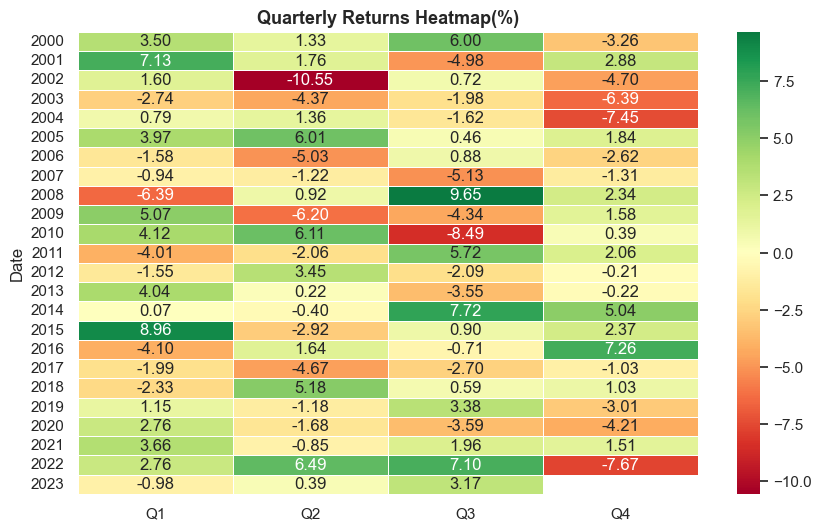

In [28]:
sns.set(style="white")
center_value = 0
plt.figure(figsize=(10, 6))
merged_returns_quarterly_per = merged_returns_quarterly * 100
sns.heatmap(merged_returns_quarterly_per, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5, center=center_value)
plt.title('Quarterly Returns Heatmap(%)', fontsize=13, fontweight='bold')
plt.show()

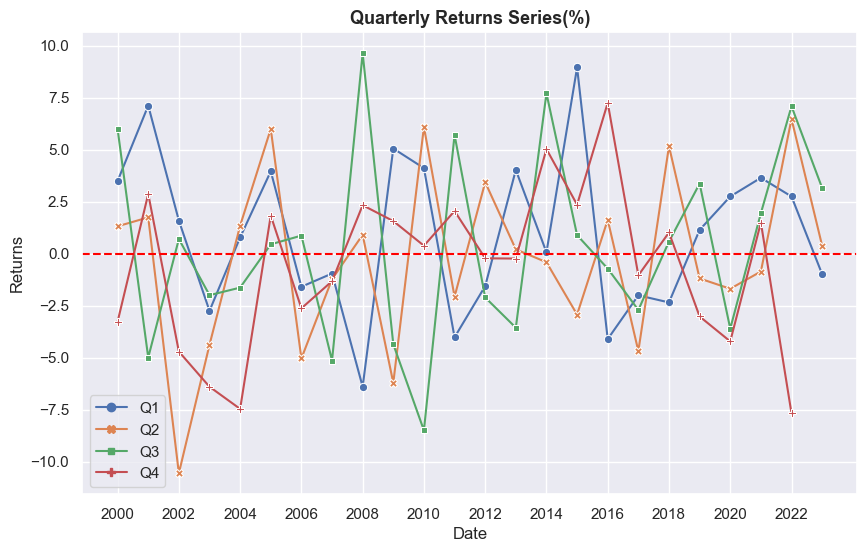

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_returns_quarterly_per, markers=True, dashes=False)
plt.xticks(range(0, len(merged_returns_quarterly_per.index), 1*2), merged_returns_quarterly_per.index[::1*2])
plt.axhline(y=0.000, color='red', linestyle='--', label='Initial Value')
plt.title('Quarterly Returns Series(%)', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

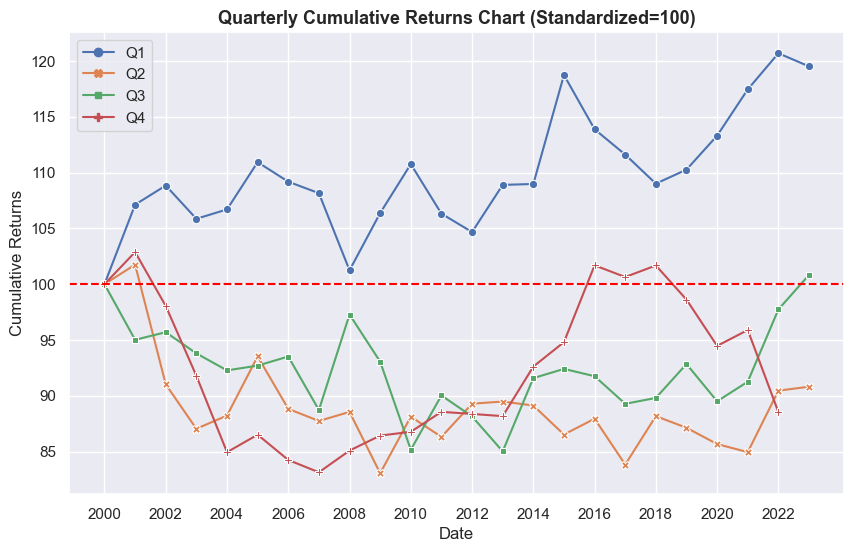

In [30]:
sns.set(style="darkgrid")
merged_returns_quarterly_subset = merged_returns_quarterly.copy()
merged_returns_quarterly_subset.iloc[0, :] = 99
cumulative_returns_quarterly = (merged_returns_quarterly_subset + 1).cumprod()

plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_returns_quarterly, markers=True, dashes=False)
plt.xticks(range(0, len(cumulative_returns_quarterly.index), 1*2), cumulative_returns_quarterly.index[::1*2])
plt.axhline(y=100, color='red', linestyle='--', label='Initial Value')
plt.title('Quarterly Cumulative Returns Chart (Standardized=100)', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [31]:
average_returns = merged_returns_quarterly.mean()
average_returns_percent = average_returns * 100
average_returns_percent = pd.DataFrame(average_returns_percent)
median_returns = merged_returns_quarterly.median()
median_returns_percent = median_returns * 100
median_returns_percent = pd.DataFrame(median_returns_percent)
merged_returns = pd.concat([average_returns_percent, median_returns_percent], axis=1)
merged_returns.columns = ['Average Returns(%)', 'Median Returns(%)']
merged_returns

,Average Returns(%),Median Returns(%)
Q1,0.957780,0.974021
Q2,-0.261806,-0.091303
Q3,0.377348,0.525943
Q4,-0.599006,-0.212667


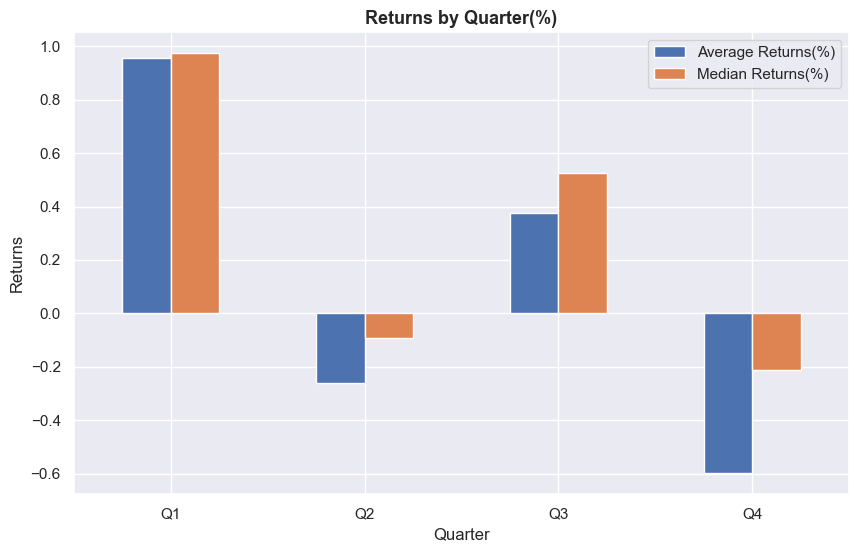

In [32]:
sns.set(style="darkgrid")
merged_returns.plot(kind='bar', figsize=(10, 6))
plt.xticks(range(len(merged_returns.index)), merged_returns.index, rotation=0)
plt.title('Returns by Quarter(%)', fontsize=13, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Returns')
plt.show()

Monthly Analysis

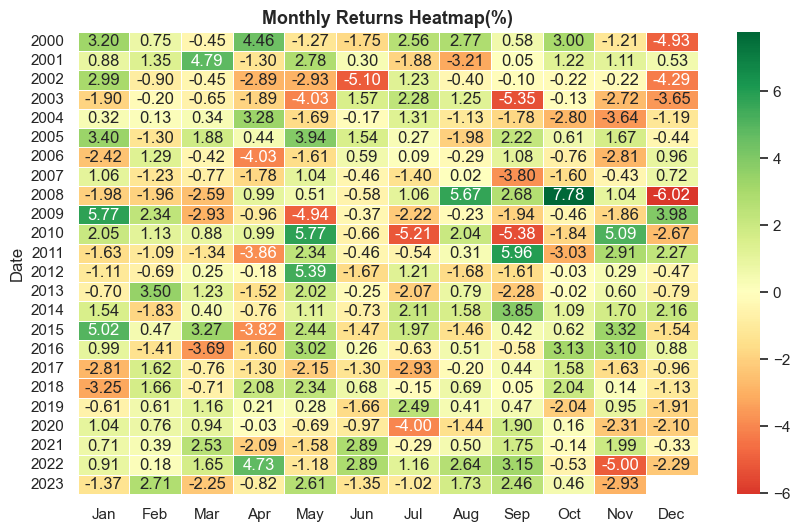

In [33]:
sns.set(style="white")
center_value = 0
plt.figure(figsize=(10, 6))
merged_returns_monthly_per = merged_returns_monthly * 100
sns.heatmap(merged_returns_monthly_per, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5, center=center_value)
plt.title('Monthly Returns Heatmap(%)', fontsize=13, fontweight='bold')
plt.show()

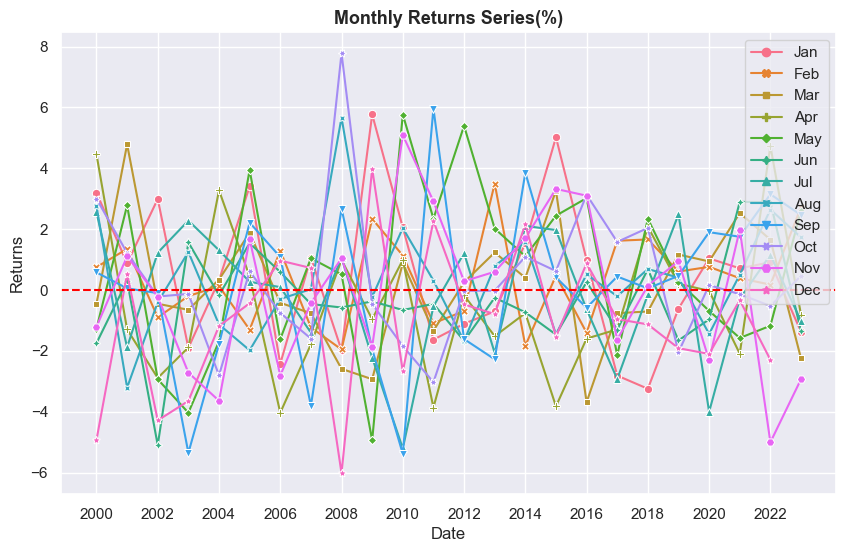

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_returns_monthly_per, markers=True, dashes=False)
plt.xticks(range(0, len(merged_returns_monthly_per.index), 1*2), merged_returns_monthly_per.index[::1*2])
plt.axhline(y=0.000, color='red', linestyle='--', label='Initial Value')
plt.title('Monthly Returns Series(%)',  fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

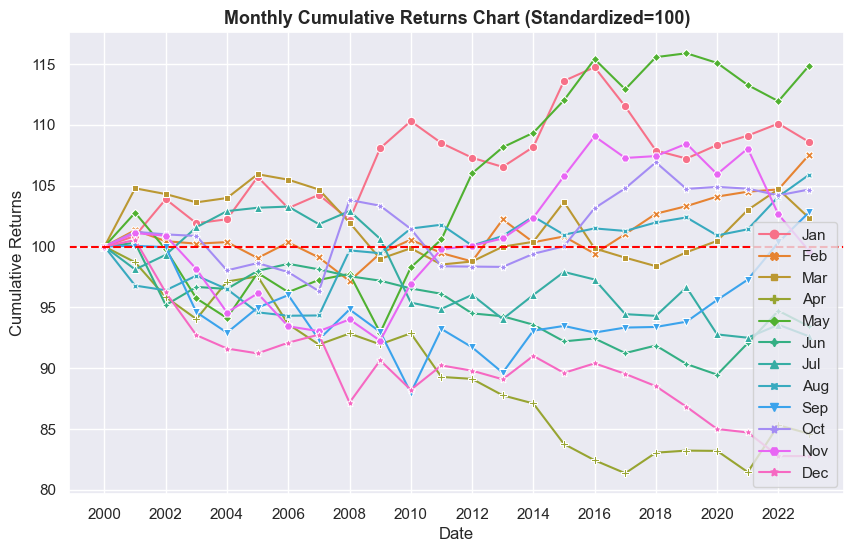

In [35]:
merged_returns_monthly_filled = merged_returns_monthly.fillna(0)
merged_returns_monthly_subset = merged_returns_monthly_filled.copy()
merged_returns_monthly_subset.iloc[0, :] = 99
cumulative_returns_monthly = (merged_returns_monthly_subset + 1).cumprod()
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_returns_monthly, markers=True, dashes=False)
plt.xticks(range(0, len(cumulative_returns_monthly.index), 1*2), cumulative_returns_monthly.index[::1*2])
plt.axhline(y=100, color='red', linestyle='--', label='Initial Value')
plt.title('Monthly Cumulative Returns Chart (Standardized=100)', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [36]:
average_returns_monthly = merged_returns_monthly.mean()
average_returns_percent_monthly = average_returns_monthly * 100
average_returns_percent_monthly = pd.DataFrame(average_returns_percent_monthly)
median_returns_monthly = merged_returns_monthly.median()
median_returns_percent_monthly = median_returns_monthly * 100
median_returns_percent_monthly = pd.DataFrame(median_returns_percent_monthly)
merged_returns_monthly_df = pd.concat([average_returns_percent_monthly, median_returns_percent_monthly], axis=1)
merged_returns_monthly_df.columns = ['Average Returns(%)', 'Meidan Returns(%)']
merged_returns_monthly_df

,Average Returns(%),Meidan Returns(%)
Jan,0.503482,0.793908
Feb,0.344499,0.430539
Mar,0.096544,-0.083837
Apr,-0.486057,-0.889643
May,0.563266,0.776930
Jun,-0.342395,-0.458623
Jul,-0.192844,-0.027034
Aug,0.369355,0.358618
Sep,0.175764,0.429660
Oct,0.338028,-0.024980


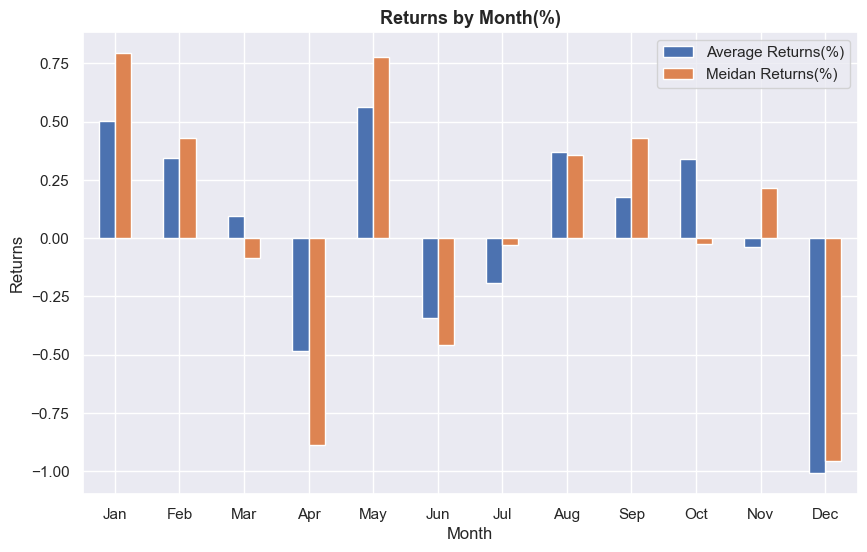

In [37]:
sns.set(style="darkgrid")
merged_returns_monthly_df.plot(kind='bar', figsize=(10, 6))
plt.xticks(range(len(merged_returns_monthly_df.index)), merged_returns_monthly_df.index, rotation=0)
plt.title('Returns by Month(%)', fontsize=13, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.show()

In [38]:
cpu_usage = psutil.cpu_percent(interval=1)
memory = psutil.virtual_memory()
total_memory = round(memory.total / (1024 ** 3), 2)  
available_memory = round(memory.available / (1024 ** 3), 2)  
disk_usage = psutil.disk_usage('/')
total_disk_space = round(disk_usage.total / (1024 ** 3), 2)  
used_disk_space = round(disk_usage.used / (1024 ** 3), 2)  
network = psutil.net_io_counters()
sent_bytes = round(network.bytes_sent / (1024 ** 2), 2)  
received_bytes = round(network.bytes_recv / (1024 ** 2), 2)  

print('CPU Usage:', cpu_usage, '%')
print('Total Memory:', total_memory, 'GB')
print('Available Memory:', available_memory, 'GB')
print('Total Disk Space:', total_disk_space, 'GB')
print('Used Disk Space:', used_disk_space, 'GB')
print('Sent Bytes:', sent_bytes, 'MB')
print('Received Bytes:', received_bytes, 'MB')

CPU Usage: 25.1 %
Total Memory: 8.0 GB
Available Memory: 1.34 GB
Total Disk Space: 228.27 GB
Used Disk Space: 9.28 GB
Sent Bytes: 4389.7 MB
Received Bytes: 35103.42 MB
